In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import matplotlib as mpl 
mpl.rcParams.update({'font.size': 18, 
                     'xtick.color': "white",
                     'ytick.color': "white",
                     'axes.labelcolor': "white",
                     'legend.columnspacing':0.5,
                     'lines.linewidth':4,
                     'legend.handlelength':1,
                     'legend.fontsize':14})

In [14]:
def loadDataFrame(filename):
    df = pd.read_csv(filename,delim_whitespace=True)


    df["cells" ] = (df["ie_"] + 1 - df["is_"])*(df["je_"] + 1 - df["js_"])*(df["ke_"] + 1 - df["ks_"])
    df["flops_per_cell_"] = 15
    df["FLOPS"] = df["nsteps_"]*df["flops_per_cell_"]*df["cells"]/df["elapsed_times_[0]"]
    df["GFLOPS"] = df["FLOPS"]/1e9
    df["cells_per_second"] = df["nsteps_"]*df["cells"]/df["elapsed_times_[0]"]

    df["cells_per_second"].max()/1e9
    
    return df
    
    

In [15]:
def plotParameterCPS(df,parameters):
    cpses = []
    labels = []
    for col in parameters:
        values = np.array(list(set(df[col])))
        mean_cpses = []
        for value in values:
            cpses.append(df.loc[df[col]==value]["cells_per_second"])
            labels.append("{}={}".format(col,value))

    plot = plt.boxplot(cpses,vert=False,labels=labels)
    plt.xlabel("Cell per Second")
    return plot

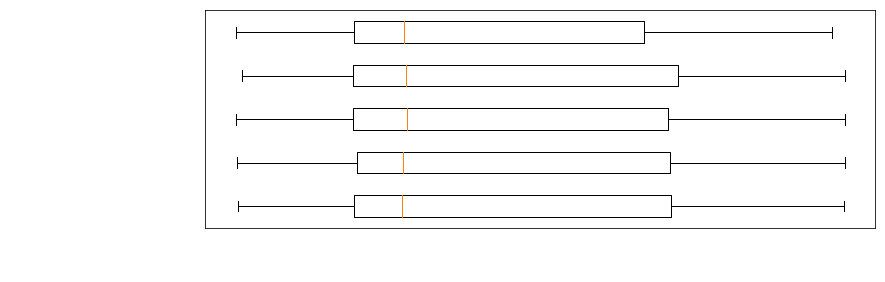

In [16]:
df = loadDataFrame("../data/CUDA_pfe.dat")
parameters = ["mem_type_","step_type_"]

plt.figure(figsize=(12,4))
plot = plotParameterCPS(df,parameters)
plt.savefig("../figures/CUDA.png",dps=300, bbox_inches = "tight")
#plt.tight_layout()
plt.show()

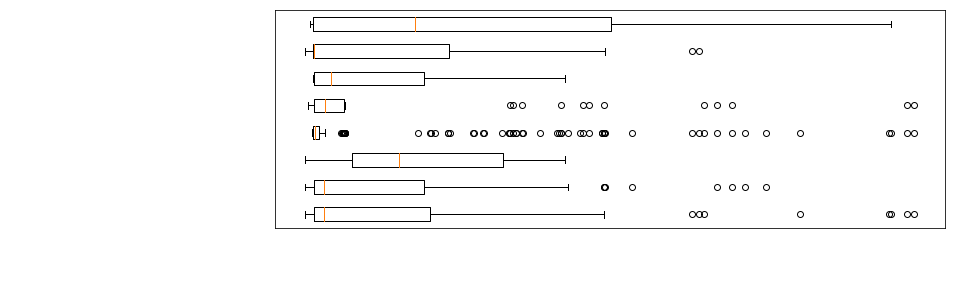

In [18]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
parameters = ["step_type_","Layout","is_"][::-1]

plt.figure(figsize=(12,4))
plot = plotParameterCPS(df,parameters)
plt.savefig("../figures/kokkosCUDA.png",dps=300, bbox_inches = "tight")
#plt.tight_layout()
plt.show()

In [19]:
df.loc[df["cells_per_second"].argmax()]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


T                                       float
Layout                    Kokkos::LayoutRight
IType                                    long
ItOuter              Kokkos::Iterate::Default
ItInner              Kokkos::Iterate::Default
ni_                                       512
nj_                                       128
nk_                                       128
size_                                 8388608
is_                                         0
ie_                                       511
js_                                         0
je_                                       127
ks_                                         0
ke_                                       127
tiling_[0]                                  0
tiling_[1]                                  0
tiling_[2]                                  0
vector_length_                              1
nvars_                                      5
pre_step_type_                          kNone
step_type_                        

In [1]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
df = df.loc[df["step_type_"] != "kTTR"]
parameters = ["step_type_","Layout","is_"][::-1]
plot = plotParameterCPS(df,parameters)
plt.title("Kokkos with CUDA")
plt.show()

NameError: name 'loadDataFrame' is not defined

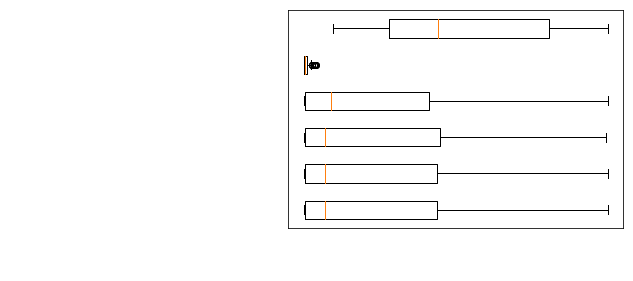

In [28]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
df = df.loc[df["step_type_"] == "kMDRange"]
df = df.loc[df["ItInner"] != "Kokkos::Iterate::Default"]
df = df.loc[df["ItOuter"] != "Kokkos::Iterate::Default"]
parameters = ["ItOuter","ItInner","Layout"]
plot = plotParameterCPS(df,parameters)
plt.show()

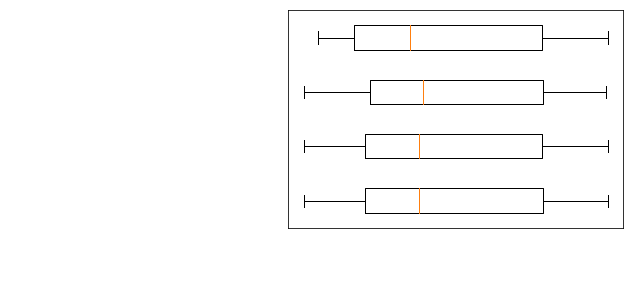

In [29]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
df = df.loc[df["step_type_"] == "kMDRange"]
df = df.loc[df["Layout"] == "Kokkos::LayoutLeft"]
df = df.loc[df["ItInner"] != "Kokkos::Iterate::Default"]
df = df.loc[df["ItOuter"] != "Kokkos::Iterate::Default"]
parameters = ["ItOuter","ItInner"]
plot = plotParameterCPS(df,parameters)
plt.show()

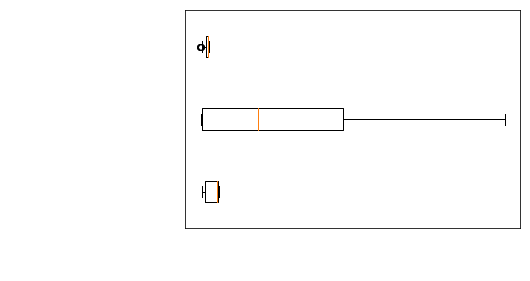

In [31]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
df = df.loc[df["step_type_"] == "kTTR"]
parameters = ["vector_length_",]
plot = plotParameterCPS(df,parameters)
plt.show()

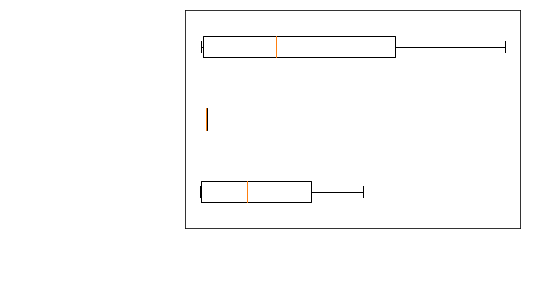

In [32]:
df = loadDataFrame("../data/kokkosCUDA_pfe.dat")
df = df.loc[df["step_type_"] == "kTVR"]
parameters = ["vector_length_",]
plot = plotParameterCPS(df,parameters)
plt.show()

In [36]:
plt.boxplot?